In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [4]:
df = pd.read_csv("asylum-seekers-monthly-2016-12-08-152150.csv")

In [5]:
df.head()

,Country / territory of asylum/residence,Origin,Year,Month,Value,Date
0,Albania,Afghanistan,2007,November,1,11-01-07
1,Albania,Afghanistan,2012,September,1,09-01-12
2,Albania,Afghanistan,2015,May,0,05-01-15
3,Albania,Afghanistan,2016,June,18,06-01-16
4,Albania,Afghanistan,2016,July,19,07-01-16


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Country / territory of asylum/residence  65499 non-null  object
 1   Origin                                   65499 non-null  object
 2   Year                                     65499 non-null  int64 
 3   Month                                    65499 non-null  object
 4   Value                                    65499 non-null  int64 
 5   Date                                     65499 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.0+ MB


In [7]:
df = df.rename(columns={'Country / territory of asylum/residence':'country'})

In [8]:
assylum_instances = df["country"].value_counts()

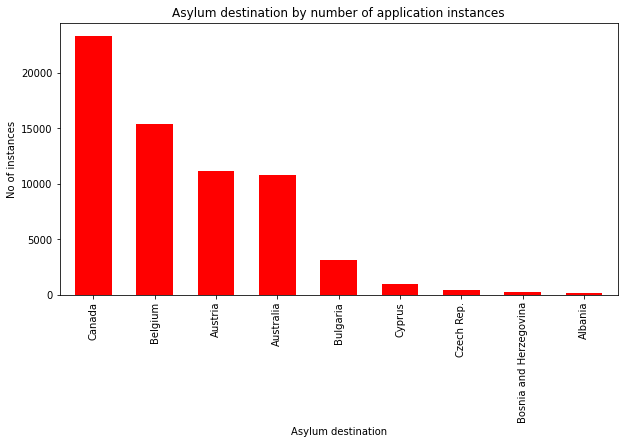

In [9]:
assylum_instances.plot(
    kind="bar",
    xlabel="Asylum destination",
    ylabel="No of instances",
    title="Asylum destination by number of application instances",
    width=0.6,
    figsize=(10,5),
    color="red"
);

In [10]:
total_asylum_seekers_per_country=df.groupby("country")["Value"].sum().sort_values(ascending=True)

In [11]:
total_asylum_seekers_per_country

country
Bosnia and Herzegovina       316
Albania                     3358
Czech Rep.                  7228
Cyprus                     16674
Bulgaria                   68909
Australia                 147729
Belgium                   316604
Austria                   394620
Canada                    451158
Name: Value, dtype: int64

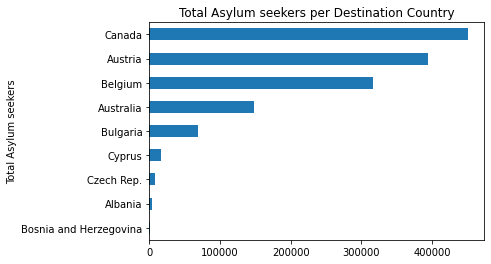

In [12]:
total_asylum_seekers_per_country.plot(
    kind="barh",
    xlabel="Total Asylum seekers",
    ylabel="Destination Country",
    title="Total Asylum seekers per Destination Country"
);

In [13]:
asylum_seeker_per_year = df.groupby("Year")["Value"].sum()
asylum_seeker_per_year

Year
1999     77503
2000    106555
2001    108136
2002     91174
2003     82626
2004     66636
2005     57689
2006     49510
2007     55135
2008     65157
2009     69420
2010     63948
2011     73921
2012     71982
2013     57524
2014     66811
2015    162726
2016     80143
Name: Value, dtype: int64

''

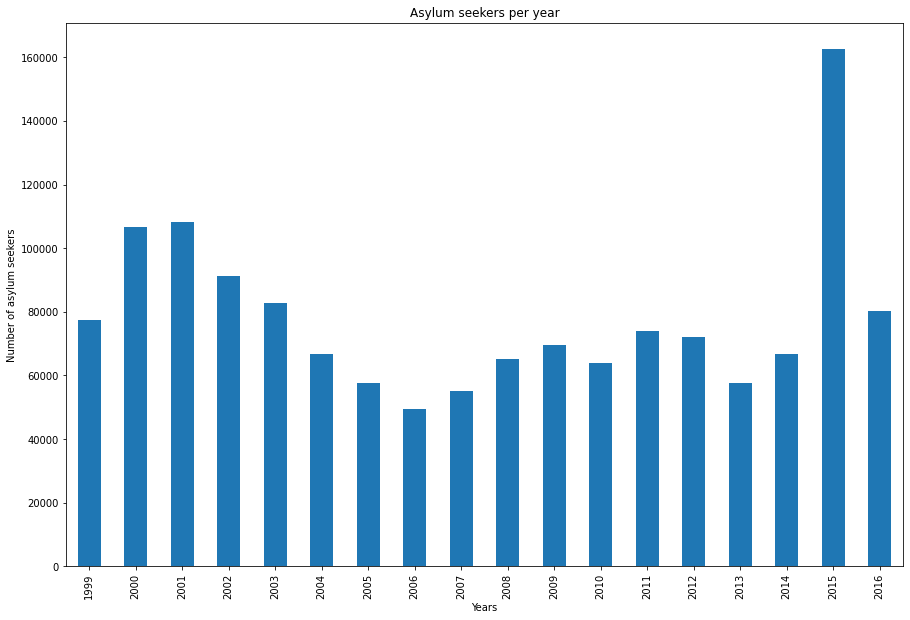

In [14]:
asylum_seeker_per_year.plot(
    kind="bar",
    figsize=(15,10),
    title="Asylum seekers per year",
    xlabel="Years",
    ylabel="Number of asylum seekers",
    grid=False
)
;

# **Doing a separate analysis into Canada as a destination**

In [15]:
df_canada =df[df["country"] == "Canada"]
df_canada.head()

,country,Origin,Year,Month,Value,Date
38140,Canada,Argentina,2002,April,65,04-01-02
38141,Canada,Argentina,2002,May,64,05-01-02
38142,Canada,Argentina,2002,June,85,06-01-02
38143,Canada,Argentina,2002,July,39,07-01-02
38144,Canada,Argentina,2002,August,22,08-01-02


In [16]:
canada_asylum_seeker_per_year = df_canada.groupby("Year")["Value"].sum()
canada_asylum_seeker_per_year

Year
1999    29685
2000    36349
2001    41033
2002    32423
2003    31076
2004    24892
2005    18662
2006    21670
2007    27530
2008    35825
2009    32442
2010    22553
2011    24850
2012    19960
2013    10135
2014    11795
2015    14401
2016    15877
Name: Value, dtype: int64

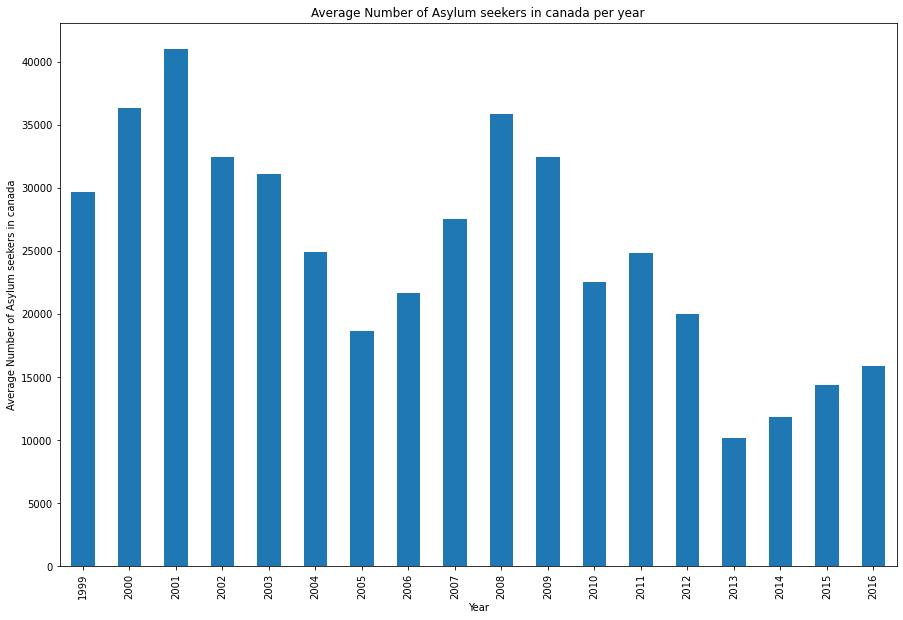

In [17]:
canada_asylum_seeker_per_year.plot(
    kind="bar",
    xlabel="Year",
    ylabel="Average Number of Asylum seekers in canada",
    title="Average Number of Asylum seekers in canada per year",
    figsize=(15,10)
);

In [18]:
canada_asylum_seeker_per_origin = df_canada.groupby("Origin")["Value"].sum().sort_values(ascending=False).head(10)
canada_asylum_seeker_per_origin

Origin
Mexico                      46805
China                       30391
Colombia                    27545
Pakistan                    24741
Hungary                     22340
Sri Lanka                   20028
Haiti                       14835
India                       14639
Nigeria                     12617
United States of America    11536
Name: Value, dtype: int64

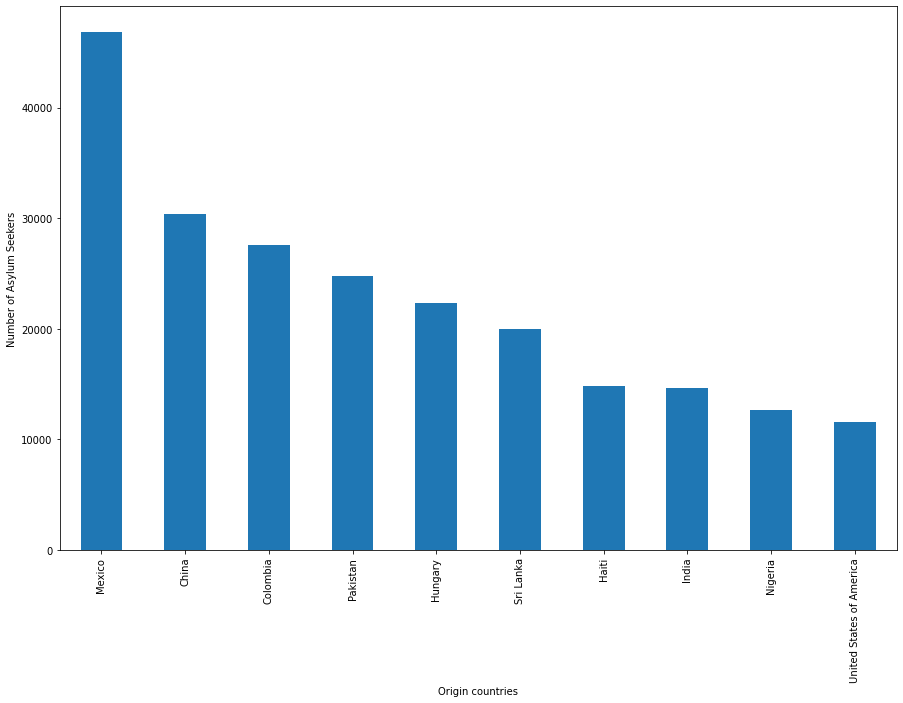

In [19]:
canada_asylum_seeker_per_origin.plot(
    kind="bar",
    ylabel="Number of Asylum Seekers",
    xlabel="Origin countries",
    figsize=(15,10),
);

In [20]:
canada_asylum_seeker_per_month = df_canada.groupby("Month")["Value"].sum().sort_values(ascending=True)
canada_asylum_seeker_per_month

Month
April        33986
February     34584
May          34931
June         35438
March        35578
December     36720
July         36895
January      37198
August       39454
November     40698
October      41836
September    43840
Name: Value, dtype: int64

<AxesSubplot:title={'center':'Assylum seekers to Canada [Monthly] '}, xlabel='Month'>

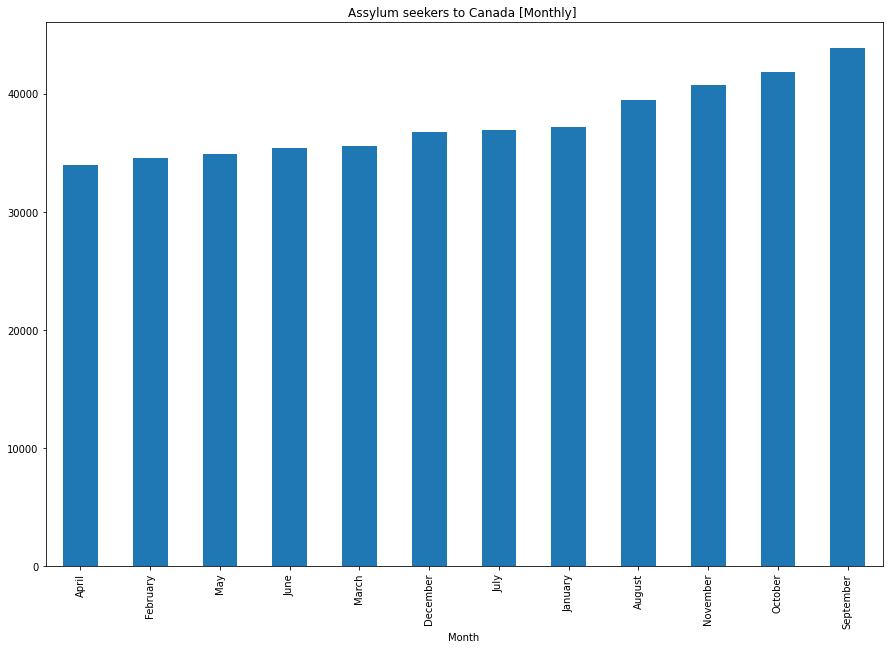

In [21]:
canada_asylum_seeker_per_month.plot.bar(
    figsize=(15,10),
    title = "Assylum seekers to Canada [Monthly] ",
    xlabel="Month"
)

# **Doing a separate analysis into Nigeria as an Origin**

In [22]:
df_nigeria_origin = df[df["Origin"] == "Nigeria"]
df_nigeria_origin

,country,Origin,Year,Month,Value,Date
102,Albania,Nigeria,2007,April,2,04-01-07
103,Albania,Nigeria,2007,September,1,09-01-07
104,Albania,Nigeria,2012,July,1,07-01-12
5822,Australia,Nigeria,1999,February,3,02-01-99
5823,Australia,Nigeria,1999,March,1,03-01-99
...,...,...,...,...,...,...
56641,Canada,Nigeria,2016,May,100,05-01-16
56642,Canada,Nigeria,2016,June,112,06-01-16
56643,Canada,Nigeria,2016,July,116,07-01-16
56644,Canada,Nigeria,2016,August,68,08-01-16


In [23]:
nigeria_asylum_year =df_nigeria_origin.groupby("Year")["Value"].sum()
nigeria_asylum_year

Year
1999     971
2000    1507
2001    1951
2002    2394
2003    2812
2004    2648
2005    1612
2006    1192
2007    1266
2008    1406
2009    1770
2010    1592
2011    1324
2012    1337
2013    1411
2014    1300
2015    2225
2016    2304
Name: Value, dtype: int64

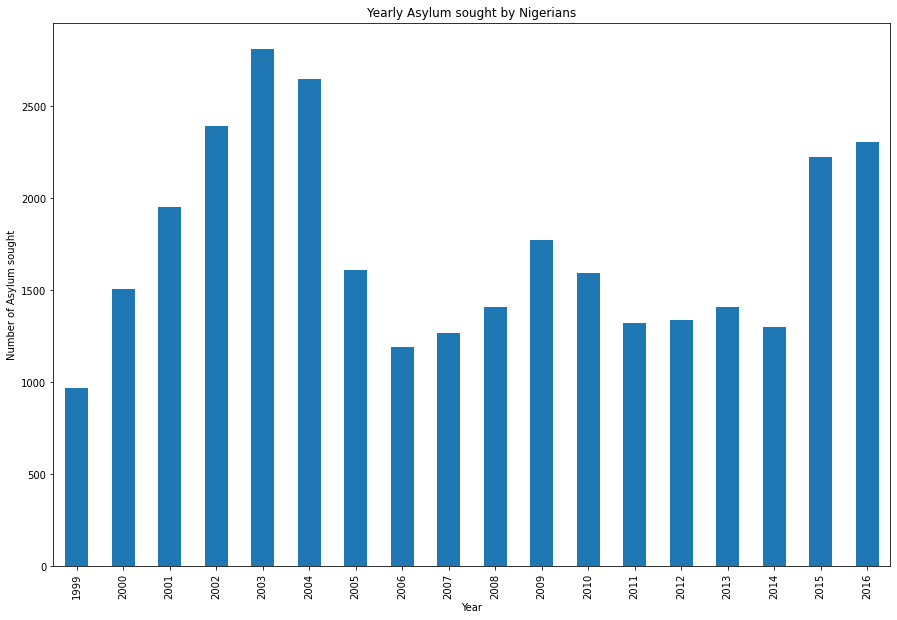

In [24]:
nigeria_asylum_year.plot.bar(
    xlabel="Year",
    ylabel="Number of Asylum sought",
    title="Yearly Asylum sought by Nigerians",
    figsize=(15,10)
);

In [25]:
nigeria_asylum_destination =df_nigeria_origin.groupby("country")["Value"].sum().sort_values(ascending=False)
nigeria_asylum_destination

country
Austria                   14989
Canada                    12617
Belgium                    2121
Australia                   802
Bulgaria                    486
Albania                       4
Bosnia and Herzegovina        3
Name: Value, dtype: int64

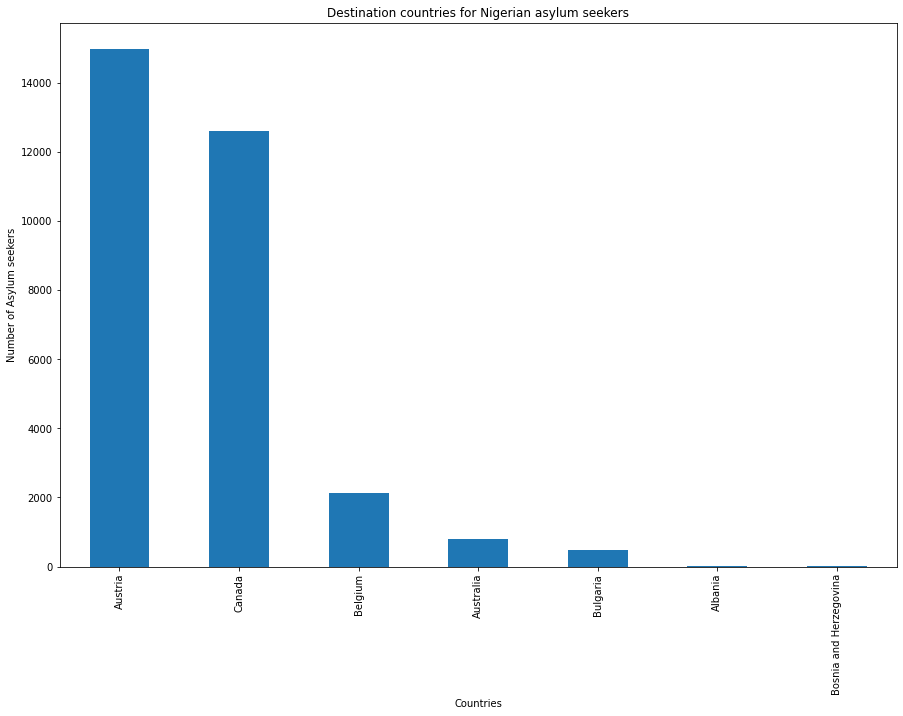

In [26]:
nigeria_asylum_destination.plot.bar(
    figsize=(15,10),
    title="Destination countries for Nigerian asylum seekers",
    xlabel="Countries",
    ylabel="Number of Asylum seekers"
);

Austria and Canada are the go-to countries for Nigerians seeking asylum. 